# Social Computing/Social Gaming - Summer 2021
# Exercise Sheet 1 - Introduction to Python and Network Visualization
Welcome to the 2021 Social Computing / Social Gaming tutorial assignments. For all exercise sheets Python is the programming language of choice. This exercise sheet will therefore provide an introduction to Python for you. In the latter part of this exercise sheet you will take on your first Social Computing task.

In addition to the iPython notebooks, it is recommended to have a look at the introduction videos and/or the introduction slides, both provided on Moodle, for every exercise sheet as they contain **helpful hints** and the **form of the assignment** which is **mandatory**!

## Task 1.1: Sparse Vector Representation
To get you prepared for using Python in the upcoming exercise sheets we will introduce some of Python's most important features on the example of sparse vectors. The basic idea is that sparse vectors (vectors whose positions are mostly zero) can be represented more efficiently by only saving a list of tuples containing the valueable data's position and its data. For example (0,0,0,4,0,0,42) would be represented by [(3,4),(6,42)].

In [193]:
# simple test function to use in exampleVector
def my_test_fun(el):
    return 5*el

In [194]:
#Your example data, make sparse Vector and include all combinations available in combineElements
ExampleVector1 = [0,0,0,4,0,0,42, 0, 0, 0, "f", 0, 0, 0, 0, 0, 0, "q", 0, 0, 0, my_test_fun, 0, 0, 0, "cool"] #TODO
ExampleVector2 = ["a", 0, 0, "f", 0, 3, 4, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, "d", 0, 0, 0, 4, 0, 0, 0, my_test_fun]  #TODO


**a)** As the first step, **complete** the ``sparseVectorTransform()`` function so that it transforms the given vector to a list of tuples as stated in the example above. Create reasonable ``ExampleVectors`` in the block above to test your function.

**Hint:** You can use ``enumerate()`` in a for-loop.

In [195]:
def sparseVectorTransform(vector):
    
    #TODO:
    new_vec = []
    for i, v in enumerate(vector):
        if v != 0:
            new_vec.append([i,v])

    return new_vec

In [196]:
# short Test if sparse vector transformation works
sparse_vec1 = sparseVectorTransform(ExampleVector1)
sparse_vec2 = sparseVectorTransform(ExampleVector2)

print("Vector 1:")
print("Vector: ", ExampleVector1, "\nSparse Vector: ", sparse_vec1)
print("Vector 2:")
print("Vector: ", ExampleVector2, "\nSparse Vector: ", sparse_vec2)

Vector 1:
Vector:  [0, 0, 0, 4, 0, 0, 42, 0, 0, 0, 'f', 0, 0, 0, 0, 0, 0, 'q', 0, 0, 0, <function my_test_fun at 0x7fedc48acc80>, 0, 0, 0, 'cool'] 
Sparse Vector:  [[3, 4], [6, 42], [10, 'f'], [17, 'q'], [21, <function my_test_fun at 0x7fedc48acc80>], [25, 'cool']]
Vector 2:
Vector:  ['a', 0, 0, 'f', 0, 3, 4, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 'd', 0, 0, 0, 4, 0, 0, 0, <function my_test_fun at 0x7fedc48acc80>] 
Sparse Vector:  [[0, 'a'], [3, 'f'], [5, 3], [6, 4], [10, 6], [17, 'd'], [21, 4], [25, <function my_test_fun at 0x7fedc48acc80>]]


**b)** In Python, variables are not assigned to a fixed datatype in contrast to Java for example. As a result, lists, for example, may contain elements of different datatypes. Even a function can be stored in a variable or list.
Below you can see ``combineSVs()`` which combines two of our sparse vectors in tuple representation into one by only considering positions that are set in both vectors. The data entries for the respective position are combined by using the passed function. As you can see, the function is handed over just like regular parameters in Python.

In [197]:
def combineSVs(func,SV1,SV2):
    returnlist = []
    for element1 in SV1:
        for element2 in SV2:
            if element1[0] == element2[0]: returnlist.append( (element1[0], func(element1[1],element2[1])))
    return returnlist

It is now your task to **define** such a combining function to hand over to the `combineSVs()`. As we will only know at runtime what datatypes are contained in the vector, this function first needs to check which datatypes the given parameters have. For this task we will allow the vectors to contain Integers, Strings and Functions.
Depending on datatypes, the result for their combination should be:
- Integer & Integer => Add both Integers
- String & String => Concatenate both String sequences
- String & Integer => Add the Integer as character at the end of the String
- Integer & String => Multiply the String sequence by Integer.
- Function & (String||Integer) => The result of the Function with the String or Integer as its parameter

In [198]:
def combineElements (element1,element2):
    types = ['type1','type2']
    
    
    #TODO: Assign the datatypes of the elements to types
    types = [type(element1), type(element2)]
    
    
    #TODO: Create the correct result regarding the datatypes in types and return it
    # create sample types for comparison 
    tint = type(1) # isinstance(x, int)
    tstr = type("") # isinstance(x, basestring)

    # adding & concatenation
    if types[0] == types[1]:
        return element1 + element2
    # append integer at end of string
    elif types[0] == tstr and types[1] == tint:
        return element1 + str(element2)
    # repeat string
    elif types[0] == tint and types[1] == tstr:
        return element1 * element2
    # check if element is a function and call it
    elif callable(element1):
        return element1(element2)
    else:
        return element2(element1)
    
    #If the elements' datatypes do not fit any of our combination this exception will be thrown
    raise TypeError("Zulässige Komibnationen der Datentypen nicht eingehalten!")

**c)** Now **update** your previously set ``ExampleVectors`` so that all of our set combinations come to effect at least once and **compute** your final combined sparse vector in tuple representation. Then shortly **explain** in your own words the chances and pitfalls of Python's datatype independent variables. Three sentences will be sufficient.

In [199]:
print(combineSVs(combineElements, sparseVectorTransform(ExampleVector1), sparseVectorTransform((ExampleVector2))))

[(3, 'ffff'), (6, 46), (10, 'f6'), (17, 'qd'), (21, 20), (25, 'coolcoolcoolcoolcool')]


**TODO: Write your explanation here:**

## Task 1.2: Twitch Social Network with NetworkX

For your second task you will now take your first steps into Social Computing / Social Gaming. We will therefore have a look at German streamers from [Twitch](https://www.twitch.tv/) [1]. Twitch is an international platform for live-streaming games or other content. The data set [2] has been created in 2019 and contains lots of information about different streamers. 
For our tasks we will only consider the German Twitch-streamers. Twitch offers lots of functionalities including a friendship system. The task is to draw a graph representing the **friendship network** of the hundred most watched German streamers.

In [2]:
#Import the required libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

**Read** in the data set by using the **Pandas** library [3]. It can represent the data sets as ``DataFrame`` objects and offers a multitude of functionalities for you. For your exercise sheets it will always come in handy to have a look at the used package's **documentations** online!

**Inspect** the three dataframes to fully understand what they contain. Don't confuse the Twitch IDs (``id``) with the node's IDs for our data set (``new_id``), which will form the key for our dataset.

**Hint:** You can have a look at the first entries of your Pandas data-frames with `Dataframe.head(10)`.

In [3]:
#Contains a multitude of information about the streamers (adressed by their Twitch IDs).
nodes_DF = pd.read_csv('musae_DE_target.csv')
#Contains the friendship relations between streamers.
edges_DF = pd.read_csv('musae_DE_edges.csv')
#Contains the names of the top 100 Twitch-streamer for their Twitch IDs.
twitchNames_DF = pd.read_csv('TwitchIDList.csv')

**a)** First, we will deal with our graph's nodes, the streamers. **Remove** the unnecessary information by **dropping** the `id`, ``days`` and ``mature`` columns from ``nodes_DF``. Limit the data on the 100 most viewed streamers, then **order** ``nodes_DF`` by ``views`` and only **keep** the first 100 entries as ``orderedNodes_DF``.

In [44]:
# first check what dataframe looks like
loc=[0,1,2,3,4,-5,-4,-3,-2,-1]
nodes_DF.iloc[loc]

,id,days,mature,views,partner,new_id
0,37905227,2149,True,162078,False,5079
1,63102384,1574,True,1370,False,4281
2,109414094,1034,True,6043,False,992
3,84163849,1319,True,94298,True,9021
4,38240837,2137,True,2323,False,330
9493,123101102,895,True,128,False,4572
9494,40627165,2001,False,44,False,6355
9495,50643307,1784,True,2038,False,206
9496,38810779,2114,False,449,False,7695
9497,58351323,1680,False,10638954,True,4451


In [46]:
#TODO:
# first drop the specified columns (axis=1), then sort by views and only take the firts 100 entries (head)
orderedNodes_DF = nodes_DF.drop(["id", "days", "mature"], axis=1).sort_values("views", ascending=False).head(100).reset_index(drop=True)
# display some part for checkup
orderedNodes_DF.iloc[loc]

,views,partner,new_id
0,100394785,True,8753
1,70620803,True,9206
2,54516100,True,7787
3,28609290,True,2498
4,27149993,True,2452
95,2710808,True,1173
96,2681760,True,5798
97,2678695,True,2914
98,2671794,True,7980
99,2658461,True,9200


**b)** Now we need to work on the friendship data-frame, our graph's edges. As we will only draw the top 100 streamers as nodes, we are only interested in friendship relations in between these 100 nodes. The relations are represented as "from"->"to" even though the friendship relation is considered undirected.

**Fill** ``drop_indices`` with all entry's indices that have their target outside of our 100 nodes. Therefore go through all entries of `edges_DF` and check if their ``to`` value is contained in ``nodesList``.
Then **drop** all the respective entries from our data-frame.

**Hint:** We do not need to worry about the ``from`` values as our merging process will take care of that part in the next task.

In [47]:
# get sense how data locks like
edges_DF.iloc[loc]

,from,to
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,7275
153133,2547,2092
153134,9461,2092
153135,9295,7802
153136,7436,9487
153137,1793,9194


In [90]:
drop_indices = []
nodesList = orderedNodes_DF['new_id'].tolist()
#TODO:
# make list of to column
edgesList = edges_DF["to"].tolist()
# check if to is NOT inside nodesList -> append
[drop_indices.append(x) for x in edgesList if x not in nodesList]

# print some sizes to check if and how many entries are dropped
print("Number of Entries to drop: ", len(drop_indices))
print("Size of data frame prior to deletion: ", len(edges_DF))
# get boolean mask
mask = ~edges_DF["to"].isin(drop_indices)
# drop all rows that contain a drop_index
trimmedEdges_DF = edges_DF[mask].reset_index(drop=True)
print("Size of data frame after deletion: ", len(trimmedEdges_DF))

# again inspect dataframe
trimmedEdges_DF.iloc[loc]

Number of Entries to drop:  126432
Size of data frame prior to deletion:  153138
Size of data frame after deletion:  26706


,from,to
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,2498
26701,8621,7802
26702,9408,7802
26703,9188,7802
26704,7606,7802
26705,9295,7802


In [86]:
# short cell to check if correct entries were dropped
import numpy as np
# get to values of all nodes outside top 100 streamers
to = np.unique(edges_DF["to"][~mask].tolist())
print(to)
# checks if any of those values is inside orderedNodes
result = []
for t in to:
    # check if current to value is contained in orderedNodes
    result.append(any(orderedNodes_DF['new_id'] == t))
# check if any value was contained in orderedNodes    
print(any(result))

[   5   14   15 ... 9495 9496 9497]
False


**c)** For the next step, we now have to **merge** our dataframes. This works similar to a SQL Join operation. We want to use an **'inner' merge** (similar to an "inner"=="normal" join in SQL) and make sure the nodes ID matches the friendship relation's origin. Thus it will only consider any friendships of our 100 nodes.

In [91]:
# merge edges and nodes DF with an inner join on from and new id
merged_DF = trimmedEdges_DF.merge(orderedNodes_DF, how="inner", left_on="from", right_on="new_id")   #TODO
merged_DF.iloc[loc]

,from,to,views,partner,new_id
0,421,7208,7105263,True,421
1,422,2145,3519790,True,422
2,430,7787,16380941,False,430
3,430,2684,16380941,False,430
4,617,4042,6403862,True,617
823,8992,7802,3574370,True,8992
824,8992,9057,3574370,True,8992
825,9057,7802,8293504,True,9057
826,9187,9354,5878152,True,9187
827,9206,7802,70620803,True,9206


Now networkX [4] **reads** all the edges from our dataframe and creates a Graph object. **Take a look** at the number of nodes in your graph and **explain** your observations shortly.

In [92]:
graph = nx.from_pandas_edgelist(merged_DF, "new_id", "to")

#TODO: Take a look at the number of nodes
print(len(graph.nodes))

95

**TODO: Write your explanation here:**

The graph only contains 95 nodes, whereas the top 100 streamers were considered. This means, that 5 nodes where lost during the merge operation, which is due to those nodes having no connections to one of the other 99 streamers.  

**d)** Before we finally draw our graph, lets add some **additional information** to it. We want to represent if the respective streamer is an official Twitch-partner by the **color** of a node.  The ``partner`` column in our dataframe will provide you with the partner-status. 

All entries were represented by their ID until now. To make our graph more legible we want to name all nodes with the streamers' actual names that are contained in ``twitchNames_DF``. You have now to **create two dictionaries** that map the nodes ID to its partner state and streamer's name.

After that the given code will create the color-map from your dictionary that will later be used to apply the colors to our graph. Then the graph object is created.

**Hint:** As ``twitchNames_DF`` only contains the most 100 viewed streamer's names you can use it as an indicator whether you have solved everything correctly.

In [113]:
merged_DF.iloc[loc]

,from,to,views,partner,new_id
0,421,7208,7105263,True,421
1,422,2145,3519790,True,422
2,430,7787,16380941,False,430
3,430,2684,16380941,False,430
4,617,4042,6403862,True,617
823,8992,7802,3574370,True,8992
824,8992,9057,3574370,True,8992
825,9057,7802,8293504,True,9057
826,9187,9354,5878152,True,9187
827,9206,7802,70620803,True,9206


In [142]:
# get custom dictionary by using groupby and putting outcome to a list
# approach suffers from lists containing only duplicates therefore only the first element is selected 
partnerState_dict = merged_DF.groupby(['new_id'])['partner'].apply(list).apply(iter).apply(next).to_dict() #TODO
temp_dict = merged_DF.groupby(['to'])['partner'].apply(list).apply(iter).apply(next).to_dict()
partnerState_dict.update(temp_dict)
twitchNames_dict = twitchNames_DF.groupby(['new_id'])['TwitchName'].apply(list).apply(iter).apply(next).to_dict() #TODO

colormap = []
for node in graph:
    if(partnerState_dict[node] == True):
        colormap.append('Purple')
    else:
        colormap.append('Blue')

graph = nx.relabel_nodes(graph, twitchNames_dict)

**e)** Now to conclude your first exercise sheet you can finally draw the graph. NetworkX offers you multiple pre-defined **[graph layouts](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)** [5] that you can use. Don't forget to make use of the ``colormap`` and the set options! Matplotlib will then print your graph.

**Try** out the different layouts and chose two that fit the graph well. Then **explain** why they fit well and what **observations** you could draw from our visualized network shortly!

* bipartite_layout(G, nodes[, align, scale, …]) -> only straight line -> not helpful
* circular_layout(G[, scale, center, dim]) -> many edges overlayed -> not really useful
* kamada_kawai_layout(G[, dist, pos, weight, …]) -> positions nodes, s.t. nodes with more connections are in the center (central nodes) -> quite helpful
* lanar_layout(G[, scale, center, dim]) -> error, graph is not planar
* random_layout(G[, center, dim, seed]) -> many edges overlap -> not really useful, however better than circular
* shell_layout(G[, nlist, rotate, scale, …]) -> same as circular
* spring_layout(G[, k, pos, fixed, …]) -> similar to kamada_kawai -> good
* spectral_layout(G[, weight, scale, center, dim]) -> very high level view, helps to distinguish outliers, but that's it
* spiral_layout(G[, scale, center, dim, …]) -> not useful at all in this case, same as circular
* multipartite_layout(G[, subset_key, align, …]) -> needs subset_key -> doesn't work

In [148]:
layouts = [nx.bipartite_layout(graph, graph.nodes), nx.circular_layout(graph), nx.kamada_kawai_layout(graph), nx.random_layout(graph), nx.shell_layout(graph), nx.spring_layout(graph), nx.spectral_layout(graph), nx.spiral_layout(graph)]

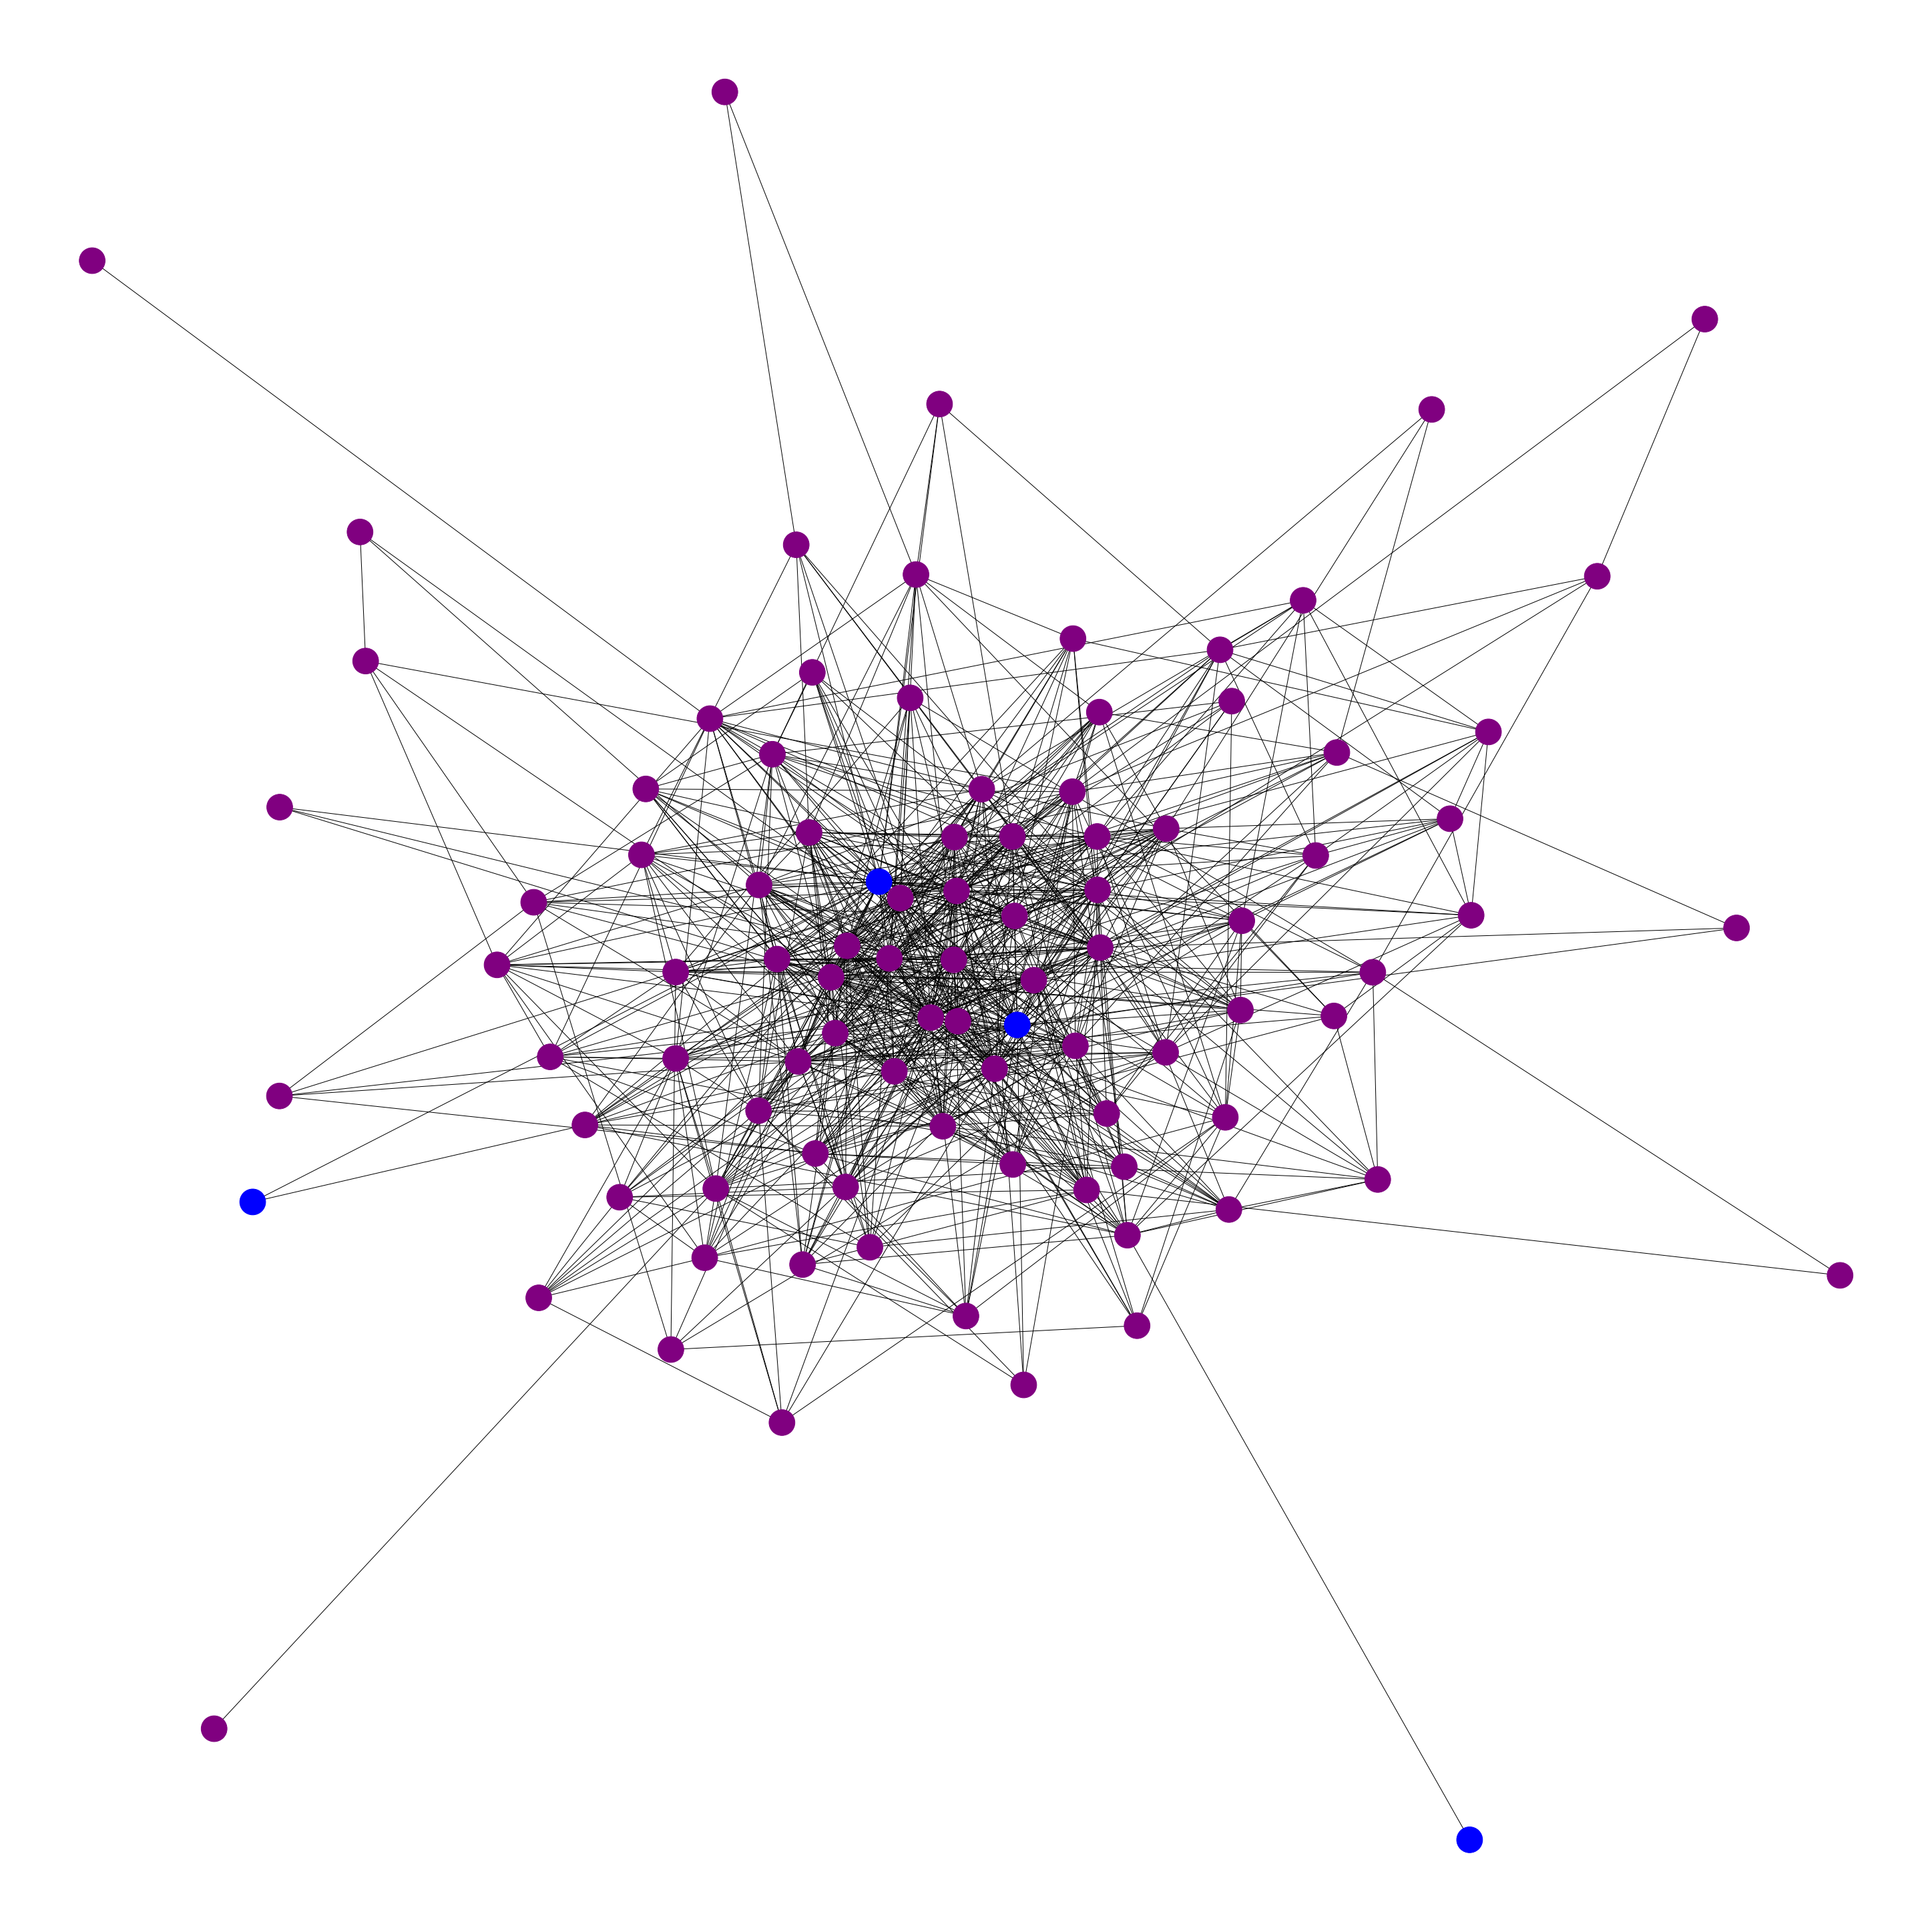

In [158]:
plt.figure(1,figsize=(40,40)) 
options = {
    "font_size" : 30,
    "edge_color": 'lightGrey'
    }

#TODO: Draw the network
values = colormap
edge_colors = ['black' for edge in graph.edges()]
# use layout 2 = kamada_kawai or 5 = spring_layout
nx.draw(graph,pos=layouts[5], node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)

plt.show()

**TODO: Write your explanation and observations here:**

I have no fucking idea :D

## References

<br>[1] https://www.twitch.tv/
<br>[2] Rozemberczki, B., Allen, C. & Sarkar, R. (2019). *Multi-scale Attributed Node Embedding*
<br>[3] https://pandas.pydata.org/docs/getting_started/index.html
<br>[4] https://networkx.org/documentation/stable/reference/index.html
<br>[5] https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout